In [2]:
import numpy as np
import pandas
import cv2
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
data = pandas.read_csv('A_Z Handwritten Data.csv')

In [3]:
labels = data.iloc[:, 0].values
images = data.iloc[:, 1:].values

In [4]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.1, random_state=42)

In [5]:
train_images = train_images.reshape((335205, 28 * 28))
train_images = train_images.astype('float32') / 255

In [7]:
test_images = test_images.reshape((37245, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
def to_one_hot(labels, num_classes=26):
    results = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [9]:
train_labels = to_one_hot(train_labels)
test_labels = to_one_hot(test_labels)

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [11]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [16]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

        # # For importing previously saved weights and biases
        #
        # if os.path.exists('weights_input_hidden_file.npy'):
        #     self.weights_input_hidden = np.load('weights_input_hidden_file.npy', allow_pickle=True)
        # else:
        #     self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        # if os.path.exists('biases_hidden_file.npy'):
        #     self.bias_hidden = np.load('biases_hidden_file.npy', allow_pickle=True)
        # else:
        #     self.bias_hidden = np.zeros((1, self.hidden_size))
        
        # if os.path.exists('weights_hidden_output_file.npy'):
        #     self.weights_hidden_output = np.load('weights_hidden_output_file.npy', allow_pickle=True)
        # else:
        #     self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        # if os.path.exists('biases_output_file.npy'):
        #     self.bias_output = np.load('biases_output_file.npy', allow_pickle=True)
        # else:
        #     self.bias_output = np.zeros((1, self.output_size))

        # Accuracy params
        self.epoch_array = []
        self.loss_array = []
        self.accuracy_array = []
        
    def forward(self, x):
        # Forward pass
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)
        
        return self.output
    
    def backward(self, x, y, output, learning_rate):
        # Backpropagation
        error = y - output
        
        output_delta = error * sigmoid_derivative(output)
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        
        self.weights_hidden_output += learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        
        self.weights_input_hidden += learning_rate * np.dot(x.T, hidden_delta)
        self.bias_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)
        
    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(0,len(x),32):
                # Forward pass
                input_data = x[i:i+32]
                target = y[i:i+32]
                output = self.forward(input_data)

                # Backward pass
                self.backward(input_data, target, output, learning_rate)

            loss = np.mean(np.square(y - self.forward(x)))
            print(f'Epoch {epoch}: Loss = {loss}')
            self.epoch_array.append(epoch)
            self.loss_array.append(loss)
            predictions = nn.forward(test_images)
            self.accuracy_array.append(np.mean(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1)) * 100)

In [17]:
input_size = 784  # 28*28
hidden_size = 32
output_size = 26

In [18]:
nn = NeuralNetwork(input_size, hidden_size, output_size)

In [19]:
nn.train(train_images, train_labels, epochs=20, learning_rate=0.1)

Epoch 0: Loss = 0.01064311664916423
Epoch 1: Loss = 0.00802901490040359
Epoch 2: Loss = 0.007412803729935587
Epoch 3: Loss = 0.006700402600196645
Epoch 4: Loss = 0.006453211834837924
Epoch 5: Loss = 0.006313283483947375
Epoch 6: Loss = 0.006167858039923543
Epoch 7: Loss = 0.005757731699024248
Epoch 8: Loss = 0.005629289682895529
Epoch 9: Loss = 0.005529888639580376
Epoch 10: Loss = 0.005419921328927241
Epoch 11: Loss = 0.005363205267971042
Epoch 12: Loss = 0.005345400269573559
Epoch 13: Loss = 0.005255285631122518
Epoch 14: Loss = 0.005246173366532322
Epoch 15: Loss = 0.005102169963040303
Epoch 16: Loss = 0.0050814177910689165
Epoch 17: Loss = 0.005040450066063784
Epoch 18: Loss = 0.004981676739206356
Epoch 19: Loss = 0.004960628282322685


<function matplotlib.pyplot.show(close=None, block=None)>

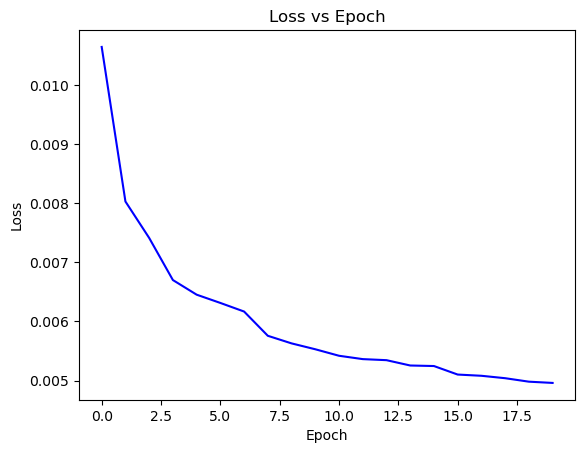

In [20]:
plt.plot(nn.epoch_array, nn.loss_array, 'blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

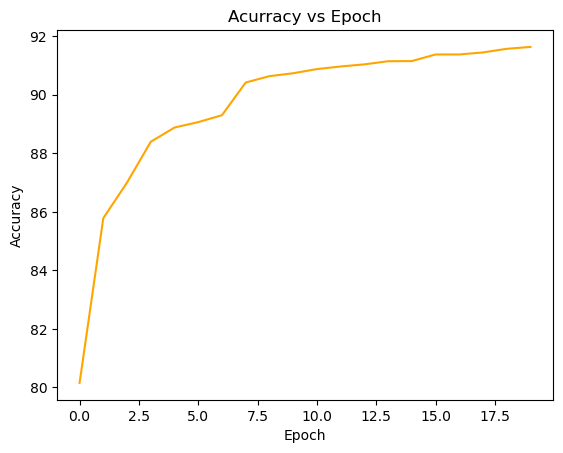

In [21]:
plt.plot(nn.epoch_array, nn.accuracy_array, 'orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Acurracy vs Epoch')
plt.show

In [22]:
predictions = nn.forward(test_images)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1)) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 91.63%


In [ ]:
# For saving weights and biases
np.save('biases_hidden_file.npy', nn.bias_hidden)
np.save('biases_output_file.npy', nn.bias_output)
np.save('weights_input_hidden_file.npy', nn.weights_input_hidden)
np.save('weights_hidden_output_file.npy', nn.weights_hidden_output)

In [74]:
for no in range(0,26):
    image_path = './images/' + str(chr(65+no)) + '.jpg'
    custom_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    custom_image_resized = cv2.resize(custom_image, (28, 28)) # Resize to 28x28
    custom_image_normalized = custom_image_resized.reshape((1, 28 * 28)) / 255  # Reshape and normalize
    prediction = nn.forward(custom_image_normalized)
    predicted = np.argmax(prediction)
    predicted_char = chr(65 + predicted)
    print("Predicted Character: ", predicted_char)

Predicted Character:  A
Predicted Character:  B
Predicted Character:  C
Predicted Character:  D
Predicted Character:  E
Predicted Character:  F
Predicted Character:  G
Predicted Character:  H
Predicted Character:  I
Predicted Character:  J
Predicted Character:  K
Predicted Character:  L
Predicted Character:  M
Predicted Character:  N
Predicted Character:  O
Predicted Character:  P
Predicted Character:  Q
Predicted Character:  R
Predicted Character:  S
Predicted Character:  T
Predicted Character:  U
Predicted Character:  V
Predicted Character:  W
Predicted Character:  X
Predicted Character:  Y
Predicted Character:  Z
